# Networks Assignment - CS166
# Bella Buchanan

# Part 1: Modifications

## Multiple Topics

I modified my code so that each person could have different opinions on multiple topics. These opinions are still values between zero and 1: 

In [ ]:
#How I set multiple opinions for each node
for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = [random.randint(0, 1) for _ in range(self.number_opinions)] 

It was then important to decide when each node would speak about each topic. I decided the most realistic way would be for a random topic to be chosen when two nodes interact. The update rules for the opinions stayed largely the same, however, I would only update the opinion of *the topic they spoke about.* To me, this is intuitive as your opinion on politics will not change if you just had a debate about pets.

In [ ]:
#This is how I assigned which topic to speak about
#And how I subsequently updated the opinion 
topic = random.randint(0, self.number_opinions - 1)
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'][topic] = (
                    (opinions[i][topic] + self.alpha * weight * (opinions[1-i][topic] - opinions[i][topic])

When I updated the weight between the nodes, I adjusted the rule to take the mean of all of the topics. I thought this was most fair because your relationship is still built on *all* of your similarities and differences, and not just on the previous conversation you have had. The previous conversation is still taken into account though because the opinion of the topic is updated and included when we take the mean.

In [ ]:
#Updating the edge weight using the mean of all of the opinions of each node 
self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(np.mean(opinions[0]) - np.mean(opinions[1][topic]))))

## Persuasive People

I decided to add a persuasiveness factor to each node. I initialize a percentage of people in the group who are to be more charismatic than others, and hence able to swing their opinions more easily. For a certain percentage of the group, their charisma levels will be sampled from a normal distribution ($\mu$ = 0.1, $\sigma$=0.05). This is to ensure some variation in the levels of persuasiveness, but also to ensure that the bulk of persuaders will be centered around 0.1.

In [ ]:
#Assigning levels of persuasiveness to each node
for node in self.graph.nodes:
        if random.uniform(0,1) < self.percentage_persuaders:
            self.graph.nodes[node]['persuade'] = np.random.normal(0.1, 0.05, 1) #charismatic people 
        else:
            self.graph.nodes[node]['persuade'] = 0 #non charismatic people

I now had to go and modify the opinion updating equation to include this persuasiveness factor. Above, we saw that non-charismatic people got assigned a persuasiveness factor of 0. This is because the previous opinion updating equation includes a factor of $\alpha$ which effects the speed at which people change their opinions. We add the persuasiveness factor to $\alpha$, so when the persuasiveness factor is zero, we do not increase or decrease the speed at which people would otherwise change their opinions. Contrastingly, persuasive people who will have a persuasiveness factor above 0 normally, (sampled $N(\mu=0.1,\sigma=0.05)$) and will increase the strength of their opinion in the conversation, and hence pull the opinion of the person they are speaking to closer to their own opinion than would otherwise occur. 

In [ ]:
#New opinion updating equation that includes the
#other nodes opinion by their persuasiveness factor
#giving them a bit more weight to their opinion if 
#they are persuasive 
for i in [0, 1]:
            self.graph.nodes[edge[i]]['opinion'][topic] = (
                opinions[i][topic] + (self.alpha+float(persuasions[1-i])) * weight * 
                ((opinions[1-i][topic]) - opinions[i][topic])) #persuasiveness factor added to a

## New Friends 

I decided to adapt the way that weights are assigned to new friendships that are formed. I still create new connections once every 100 steps randomly, because I think that is reasonable, however, I no longer assign the weight of these relationships to be 0.5 because I see that to be arbitrary. Instead, I assign them a weight that relates to the differences in their opinions. I take the absolute difference of their mean opinion on all topics, and subtract it from one. This ensures that the strength of their relationship reflects how much they have in common. For example, if their opinions differ by 0.9, they are not very similar, and the weight they will be assigned will be low, 0.1.

In [ ]:
#New way of assigning weights to new relationships formed 
weight=1-abs(np.mean(self.graph.nodes[new_edge[0]]['opinion'])-np.mean(self.graph.nodes[new_edge[1]]['opinion']))

# Part 2: Local Analysis

## Rules effects on the relationship between 2 people 

To analyze the effects of the new rules' on the relationship between two people, let us create 2 hypothetical nodes:

- Node A with opinion 0.1
- Node B with opinion 0.9
- The weight of the edge between A and B is 0.5 
- We will use $\alpha = 0.03$ and $\beta =0.3$ and $\gamma=4$ for these calculations

With the original rules of updating weights and opinions we would see:

$o_{i.new} = o_{i.old} + \alpha w_{ij}(o_{j.old}-o_{i.old})$

$w_{ij.new} = w_{ij.old} + \beta w_{ij.old} (1-w_{ij.old})(1-\gamma|o_i-o_j|)$


Therefore, after one interaction we would see:

$o_{A new} = 0.1 + (0.03)(0.5)(0.9-0.1)$

$o_{A new} = 0.112$
<br><br>

$o_{B new} = 0.9 + (0.03)(0.5)(0.1-0.9)$

$o_{B new} = 0.888$
<br><br>

$w_{ij new} = 0.5 + (0.3) (0.5) (1-0.5)(1-4|0.112-0.888|)$

$w_{ij new} = 0.3422 $
<br><br>
These equations show us that after one interaction, the nodes will have opinions that are slightly closer together, but their relationship with be slightly weaker.
<br><br>
Let us now test how each of the newly added rules will effect their opinions and relationship strength. I will do them one at a time so we can see their effects individually.

### Persuasiveness factor 

Now, let us assume that Node A is convincing, and they get a persuasiveness factor of 0.02. Node B is not convincing, so they get a persuasiveness factor of 0.

The new update rule is as follows:

$o_{i.new} = o_{i.old} + (\alpha+p_j) w_{ij}(o_{j.old}-o_{i.old})$

Where $p_j$ is the persuasiveness factor of node j. Let's do the calculations:

$o_{A new} = 0.1 + (0.03+0)(0.5)(0.9-0.1)$

$o_{A new} = 0.112$
<br><br>
$o_{B new} = 0.9 + (0.03+0.02)(0.5)(0.1-0.9)$

$o_{B new} = 0.88$
<br><br>
$w_{ij new} = 0.5 + (0.3) (0.5) (1-0.5)(1-4|0.112-0.88|)$

$w_{ij new} =0.3446$
<br><br>

Here, we can see that with the new rule, B's opinion is lower (0.88<0.888) than without A being a good persuader. The lower opinion represents a greater shift towards the opinion of A (who originally had opinion 0.1). Therefore, we can see how persuaders cause greater shifts in opinions in the direction of their opinion than non-persuaders. The new weight is slightly higher than with this new rule than before because of the change to opinion B.

### Multiple opinions

The original rules stay largely the same when introducing multiple topics. As outlined above, each interaction is based around a random topic, and the opinion on that topic is updated. However, the weight is still updated based on the average of all topic opinions to include all similarities and differences between nodes as follows: 

$o_{i.new_{topic.x}} = o_{i.old_{topic.x}}+ \alpha w_{ij}(o_{j.old_{topic.x}}-o_{i.old_{topic.x}})$


$w_{ij.new} = w_{ij.old} + \beta w_{ij.old} (1-w_{ij.old})(1-\gamma|mean(o_i)-mean(o_j)|)$
<br><br>

Recall that previously we calculated the opinions and weights for 2 hyptothetical nodes A and B according to these characteristics:
- Node A with opinion 0.1
- Node B with opinion 0.9
- The weight of the edge between A and B is 0.5 
- We will use $\alpha = 0.03$ and $\beta =0.3$ and $\gamma=4$ for these calculations

So let us create a new modified hypothetical scenario so that the nodes have multiple opinions:

Nodes A and B now have multiple opinions:
- Node A has a mean opinion of 0.1 (to make it comparible to our original scenario). Their opinion on topic 1 is 0.15, and on topic 2 it is 0.05
- Node B has a mean opinion of 0.9 (to make it comparible to our original scenario). Their opinion on topic 1 is 0.82 and on topic 2 it is 0.98.
- The weight of the edge between A and B is 0.5 
<br><br>

Now, let us see how Nodes A and B interact, given that they have multiple opinions. We will randomly choose topic 2 to be the point of their conversation
<br><br>
$o_{A.new_{topic.2}} = o_{A.old_{topic.2}} +\alpha w_{ij}(o_{B.old_{topic.2}}-o_{A.old_{topic.2}})$

$o_{A.new_{topic.2}} = 0.05 + (0.03)(0.5)(0.98-0.05)$

$o_{A.new_{topic.2}} =0.06395$

$o_{B.new_{topic.2}} = 0.98 + (0.03)(0.5)(0.05-0.98)$

$o_{B.new_{topic.2}} =0.96605$
<br><br>

After their opinions on each topic have been updated, we can calculate their new mean opinions

$mean(o_{A}) = (0.06395+0.15)/2$

$mean(o_{A}) =0.106975$
<br><br>

$mean(o_{B}) = (0.96605+0.82)/2$

$mean(o_{B}) =0.893025$

So, now that we have updated the opinion of topic 2 for both nodes, and computed their new mean opinion, how does this compare to the opinions when we just had one topic?

Originally, their updated opinions were:

$o_{A new} = 0.112$

$o_{B new} = 0.888$

Comparing these values to $mean(o_{A}) =0.106975$ and $mean(o_{B}) =0.893025$ we can observe that we have seen less of a change to the original opinions (from 0.1 and 0.9) when we had multiple opinions. This is because only one opinion is updated, and we take the mean of all opinions, so the change in opinion on that topic only has an impact that is proportionally to the number of opinions each node has.

$w_{ij.new} = w_{ij.old} + \beta w_{ij.old} (1-w_{ij.old})(1-\gamma|mean(o_i)-mean(o_j)|)$

$w_{ij.new} = 0.5 + (0.3)(0.5)(1-0.5)(1-4(|0.893025-0.106975|))$

$w_{ij.new} =0.339185$
<br><br>

Without multiple opinions, our resulting weight was $w_{ij new} =0.3446$. We now see a smaller weight, which has experienced a larger change from the original weight (0.5). This is due to the bigger difference in the mean opinions.
<br><br>

Note, I have excluded the persuasiveness factor here so we can analyse the impacts of multiple opinions in isolation. In the simulation, both of these changes will be made and we will see a combination of both effects.
<br><br>

Since the third change I made has to do with adding new edges, I do not do an analysis of this on these 2 nodes since we only have 2 nodes and 1 edge.

## Critical values

### When will the weights increase or decrease?

This equation shows the change in weights according to our rules:

$\Delta w_{ij} = \beta w_{ij} (1-w_{ij})(1-\gamma|mean(o_i)-mean(o_j)|)$
<br><br>
The weight updating equation can be used to understand when weights increase and decrease. If $\Delta w_{ij} > 0$ the weight will increase, and if $\Delta w_{ij} < 0$ the weight will decrease.

$\beta$ is a scalar multiplier that adjusts the weight based on the rest of the equation. It is a value between 0 and 1 so it will not be able to determine whether $\Delta w_{ij}$ is positive or negative. 
<br><br>
Similarly, since $w_{ij}$ is a number between 0 and 1, both $w_{ij}$ and $1-w_{ij}$ will always be greater than or equal to zero. In this way, neither of these parts of the equation will be able to decrease the weight.
<br><br>
$\gamma$, however, can be used as a lever to determine whether the weight betweeen the nodes increases or decreases. The absolute difference in mean opinions between the nodes is multiplied by $\gamma$ and subtracted from 1. Therefore, if $\gamma|mean(o_i)-mean(o_j)|>1$, $\Delta w_{ij}$ will be negative and there will be a decrease in weight. If $\gamma|mean(o_i)-mean(o_j)|<1$ there will be an increase in weight. 
<br><br>
When $\gamma\leq 1$, the difference in opinions is not weighted highly, and all weights will eventually converge to 1, because the weight will not decrease so weights can either increase or stay the same, so they will eventually tend towards 1.
<br><br>

When $\gamma>1$, it is possible for the weight between the two nodes to decrease if:


$\gamma|mean(o_i)-mean(o_j)|>1$

$|mean(o_i)-mean(o_j)|>\frac{1}{\gamma}$


Otherwise, the weights will increase.

So, how do we choose a reasonable value for $\gamma$?

Well, we know that weight always needs to be greater than or equal to zero, so:

$\Delta w_{ij} \geq -w_{ij}$

Therefore:

$\Delta w_{ij} = \beta w_{ij} (1-w_{ij})(1-\gamma|mean(o_i)-mean(o_j)|)$

Substituting into our inequality:

$\beta w_{ij} (1-w_{ij})(1-\gamma|mean(o_i)-mean(o_j)|) \geq -w_{ij}$

$\beta w_{ij} (1-w_{ij}) \geq \frac{-w_{ij}}{(1-\gamma|mean(o_i)-mean(o_j)|)}$

$\frac{1}{\beta w_{ij} (1-w_{ij})} \geq \frac{(1-\gamma|mean(o_i)-mean(o_j)|)}{-w_{ij}}$

$\frac{-w_{ij}}{\beta w_{ij} (1-w_{ij})} \geq (1-\gamma|mean(o_i)-mean(o_j)|)$

$\frac{-1}{\beta (1-w_{ij})} \geq (1-\gamma|mean(o_i)-mean(o_j)|)$

$\frac{-1}{\beta (1-w_{ij})}-1 \geq (-\gamma|mean(o_i)-mean(o_j)|)$

$\frac{1}{\beta (1-w_{ij})|mean(o_i)-mean(o_j)|}+1 \geq \gamma$
<br><br>

To find the upper bound for $\gamma$ we know that since weights and opinions differences both have an upper limit of 1 and lower limit of zero, and choosing 1 opinion differences and zero for the weight will give us an upper bound of:

$\frac{1}{\beta (1)|1|}+1 \geq \gamma$

$\frac{1}{\beta}+1 \geq \gamma$

$\gamma \leq \frac{1}{\beta}+1$

<br><br>
To find the lower bound, we set the weight to 1 and the opinion differences to 1:

$\frac{1}{\beta (0)|1|}+1 \geq \gamma$
$0 \geq \gamma$

So, reasonable values for $\gamma$ are:

$0\leq \gamma \leq 1+\frac{1}{\beta}$




### When do opinions converge or diverge?

Let us look at the original update rule:

$o_{i.new} = o_{i.old} + \alpha w_{ij}(o_{j.old}-o_{i.old})$

This is equivalent to:

$\Delta o_{i} = \alpha w_{ij}(o_{j}-o_{i})$ --(1)

And for the other node it is:

$\Delta o_{j} = \alpha w_{ij}(o_{i}-o_{j})$ --(2) 

For both equation (1) and (2) $\alpha$ and $w_{ij}$ are greater than zero. For the most part, either $o_{j}>o_{i}$ or $o_{j}<o_{i}.$ This means that $\Delta o_{i} = - \Delta o_{j}$ provided that $o_{j}\neq o_{i}$.
<br>

This means that provided that  $|\Delta o_{i}|\leq |o_{j}-o_{i}|$, the opinions will move closer together (convergence). 
<br>

However, if  $|\Delta o_{i}|> |o_{j}-o_{i}|$, the opinion change will "overshoot" and opinions i and j will move further apart (divergence). This divergence is largely by the constraint of having $\alpha\epsilon(0,0.5]$

If the weight and $\alpha$ are at their maximum, the difference in opinions is only multiplied by $1*0.5=0.5.$ This means that $\Delta o_{i}$ will only over be a maximum of 50% of the difference in opinions of the 2 nodes, and we will avoid such divergence. When $\alpha = 0.5$ and $w_{ij}=1$ the opinions of the nodes will become equal. This is because half of their difference is added to one node, and the other half is subtracted from the other node.

In our modified version of the code, $\Delta o_{i} = - \Delta o_{j}$ does not necessarily hold true. This is because the nodes' persuasiveness values could be different. 

$o_{i.new} = o_{i.old} + (\alpha+p_j) w_{ij}(o_{j.old}-o_{i.old})$

In this case, the higher the persuasiveness value of the old node, the higher the chance for "overshoot" because adding a larger $p$ means that the difference in their opinions is multiplied by a larger number, $\alpha + p $. If $\alpha + p_j>0.5$, we will not necessarily see convergence to the central number between their two opinions, but could see both $o_i$ and $o_j$ move above and below this central point respectively.
<br><br>
We need to consider what is realistic for our model. I would like to keep $\alpha\epsilon(0,0.5]$ so that we can adjust how quickly opinions move closer together (when $\alpha$ is 0.5 and $p_j$ is 0, $o_i$ and $o_j$ will converge in 1 timestep). 
<br><br>
But, I would also like to see some cases where $\alpha + p_j>0.5$ because I feel it is realistic to sometimes come out of a discussion with radically different views. This does not happen all the time, but sometimes someone can convince you to shift your view more than 50% of the difference between your views in the direction of their view.
<br><br>
Therefore, we will sample $p_j$ from a normal distribution ($\mu = 0.1, \sigma = 0.05$) so that when $\alpha$ is high, there is a chance for persuaders to have $\alpha + p_j>0.5$ 
<br><br>

## Vector field plots 

Now, we will draw some vector field plots to analyse when we predict clusters to form or to split off.

### Original parameters
In the plot below, we use our original parameters on the original model ($\alpha = 0.03, \beta = 0.3, \gamma = 4$). We are able to observe two distinct basins of attraction in the model. The orange lines represent weights edges that will converge towards 1 over time, whereas the purple lines represent edges that will converge towards 0 and be deleted over time. We can see that when opinion differences are low (below about 0.2), even the edges with very low weights will increase over time to 1. Conversely, the weights edges with higher opinion differences converge to zero eventually, despite their weights. This is because of what we analysed theoretically above, weights will decrease if:

$|mean(o_i)-mean(o_j)|>\frac{1}{\gamma}$

In this case, $\frac{1}{\gamma}= 0.25$, which makes sense as we see a convergence towards zero after 0.25.

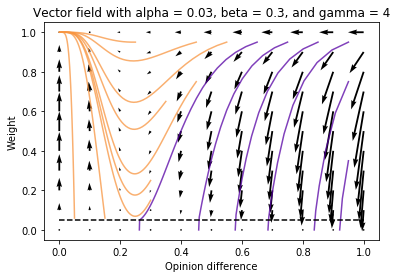

In [3]:
draw_plot(0.03,0.3,4)
plt.title('Vector field with alpha = 0.03, beta = 0.3, and gamma = 4')
plt.show()

### Increase alpha
Let us see what happens when we increase $\alpha$ to its maximum of 0.5. We know that $\alpha$ is a factor that effects the rate of change in opinion so if opinions converge faster, we expect a smaller difference in opinion, and higher weights. Below, we can mostly see a convergence towards 1, with a smaller basin of attraction tending towards zero for the reasons outlined above. Therefore, when we increase the percentage of persuaders (which effects our alpha term) I predict that we will see greater average node degree because weights tend to increase.

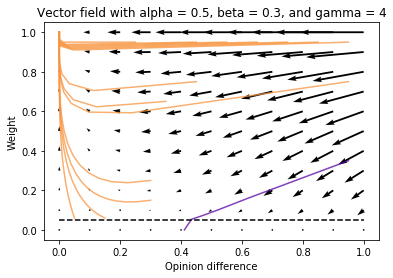

In [4]:
draw_plot(0.5,0.3,4)
plt.title('Vector field with alpha = 0.5, beta = 0.3, and gamma = 4')
plt.show()

### Decrease gamma
What about changing gamma? In the previous section we analysed that decreasing gamma would cause all weights to converge towards 1 since the differences in opinion effect the equation so little so weights will only increase, and we see exactly that below:

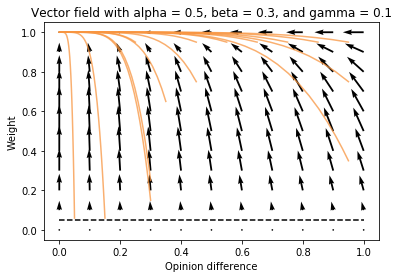

In [5]:
draw_plot(0.03,0.3,0.1)
plt.title('Vector field with alpha = 0.5, beta = 0.3, and gamma = 0.1')
plt.show()

### Increase beta

We will now increase beta to 0.9 but we also have to adjust gamma to meet its constraints so we will change gamma to 2 (its maxima since $\gamma \leq \frac{1}{\beta}+1$). We observe that a larger portion of the graph falls into the orange basin of attraction. Now, most weights tend towards 1 because $\beta$ which scales weight is higher.

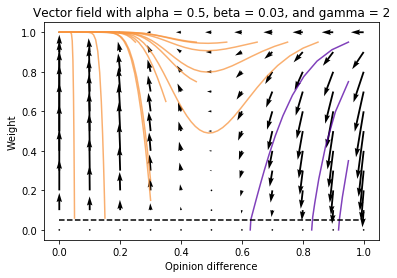

In [6]:
draw_plot(0.03,0.9,2)
plt.title('Vector field with alpha = 0.5, beta = 0.03, and gamma = 2')
plt.show()

## Values for simulation

We have many parameters we can adjust during this simulation. Here is a summary of what we discussed, and what we will test during the simulation:
- **Multiple topics:** The more topics we have, the less differences in opinions matter because they are averaged when we compute weights. Lets experiment with values of 1 to ten.
- **Persuasiveness factors and alpha:** We spoke about how if $\alpha + p_j>0.5$ we may see divergence in opinions, whereas when $\alpha + p_j=0.5$ we would see total convergence. 
- **Gamma:** When $\gamma > 1$ weights will converge to 1. When $\gamma|mean(o_i)-mean(o_j)|<1$. 
$\gamma \leq \frac{1}{\beta}+1$
- **Beta:** $\beta \epsilon (0,1)$ since it is the factor that scales the updated weight, and weight is between 0 and 1.

### Expectations for clustering

Clustering is defined as "how densely connected the nodes are to each other in a localized area in a network" (Sayama, 2015). In this simulation, we can expect higher levels of clustering when edge weights converge to 1, and lower levels when they converge to zero (because edges dissapear when below 0.05).

From the analysis above, we know that when $\gamma\leq 1$, the difference in opinions is not weighted highly, and all weights will eventually converge to 1 and cause high levels of clustering. So, we expect values of  $\gamma> 1$ to have a chance of convergence towards zero. We know that weights will decrease if $|mean(o_i)-mean(o_j)|<\frac{1}{\gamma}$, but this depends on the values of the opinons so we will play around with different values for gamma in our simulation and see how much we can decrease clustering in the graph.

Another way we could effect clustering is with manipulating $\beta$. If $\beta$ is large, it has a larger effect on the scaling of weights. We will also manipulate beta to see if higher betas lead to higher clustering. 


# Part 3: Implementation 

## Type of Graph 

I have chosen to initialize my graph using a Barabási-Albert graph. The reason I have done so is because I feel that the graph is most realistic because it uses a model of preferential attachment. The degrees of nodes follow a 'power law' distribution, which means that nodes have low degrees, but a few have very high degrees. There nodes with high degrees become 'popular hubs.' I feel that since we are modeling a social network and trying to simulate realistic social interactions, we should use this scale-free model which creates 'popular nodes' as opposed to the Watts-Strogatz and Erdos-Renyi models which create random graphs that do not result in hubs around popular nodes.

## Code

See appendix for all classes and functions

# Part 4: Simulation

In this next section, I will seek to answer the question: How do changing parameters effect network clustering? 

## Original parameters

First, let us see how the network evolves with the original parameters given to us in the pre-class work of class 7.2 ($\alpha=0.03,\beta = 0.3,\gamma = 4, number.opinions = 1, percentage.persuaders =0$) 

Note, $number.opinions$ and $percentage.persuaders$ are new parameters we added, so to keep to the original rules we set 1 opinion and have no people who are more persuasive than others.

The average node connectivity over 20000 iterations (step size = 2000):


/Users/bellabuchanan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


[9.0, 5.4, 5.84, 6.2, 6.52, 6.6, 7.08, 7.52, 7.76, 8.28, 8.4]

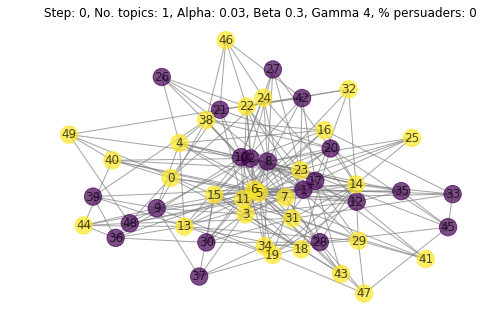

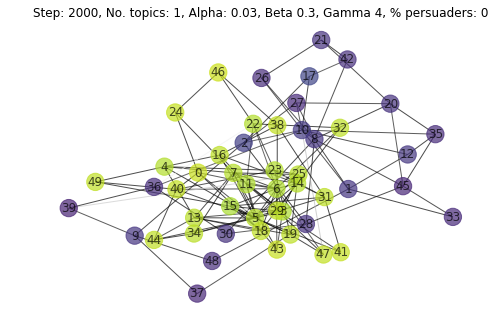

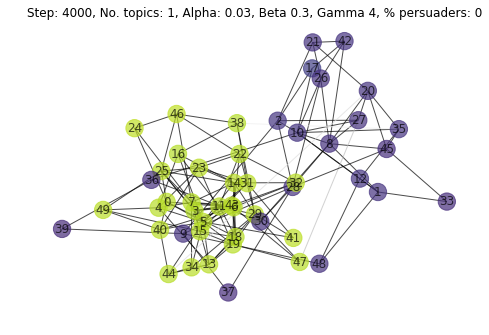

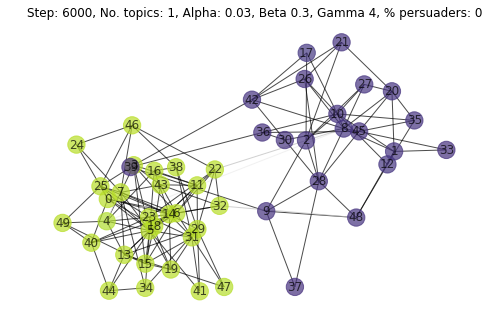

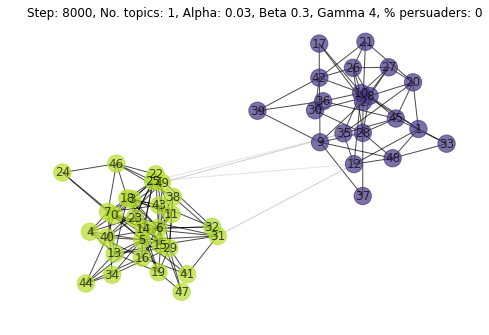

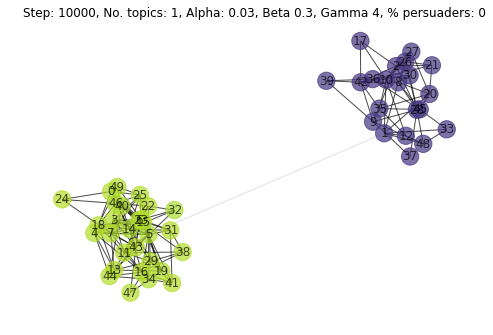

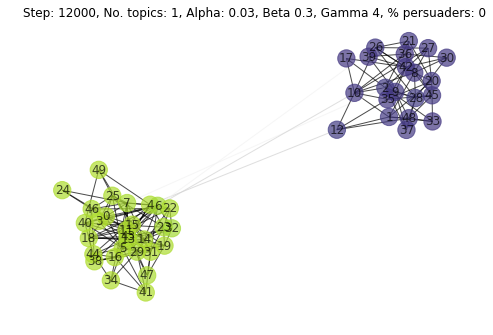

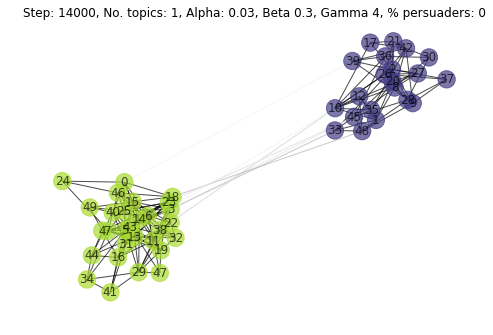

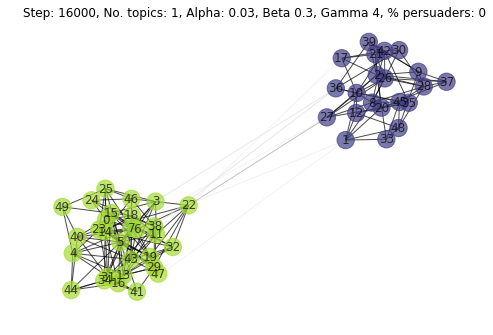

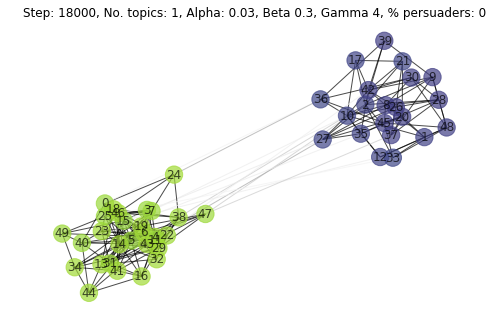

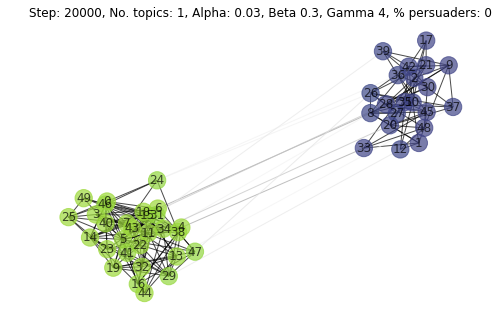

In [9]:
print('The average node connectivity over 20000 iterations (step size = 2000):')
simulation(50,0.03,0.3,4,1,0, display=True)

We can see increased clustering as the simulation progresses. The average degree of a node in the graph increases from 9 to 10.04 over 20000 iterations.

## Varying number of topics

We vary the number of topics each node has an opinion on. 

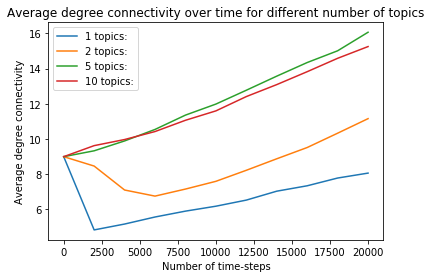

In [10]:
#Plot varying number of opinions 
for i in [1,2,5,10]:
    sim = [simulation(50,0.03,0.3,4,i,0) for j in range(3)]
    sim = np.mean(sim,axis=0) #average 3 simulations 
    plt.plot(np.linspace(0,20000,11),sim, label = str(i)+' topics:')

#labels
plt.xlabel('Number of time-steps')
plt.ylabel('Average degree connectivity')
plt.title('Average degree connectivity over time for different number of topics') 
plt.legend()
plt.show()

We see that with an increase in the number of topics, there is an increase in average degree connectivity in the graph. This is expected and was explained above because since we take the mean of all topic opinions the changing of 1 opinion on a topic will effect the average opinion less. Hence, we will see smaller differences in opinions, and smaller changes in weight leading to less edges falling below 0.05 and getting deleted.
<br><br>
This makes sense realistically, because if people's relationships are based on a lot of different levels of commonality on different topics, their relationships are less likely to break down based on one disagreement. Contrastingly, consider the US presidential elections where people only focus on one topic. We see a lot more polarisation of views between Republicans and Democrats.

Below, we can see the networks resulting after 20000 steps with 1 view and with 10 views per person. With one opinion (say on politics), we see two distinctly colored groups. When there are 10 topics, a similar group of 50 people will find more things and common and their average opinions will be not be polarised as in the politics example.

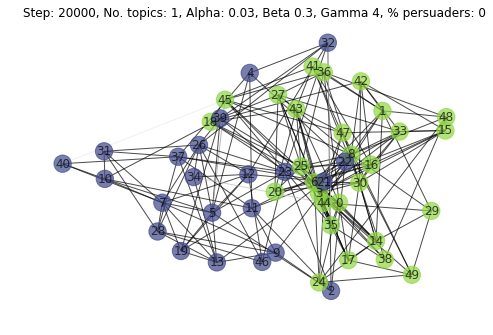

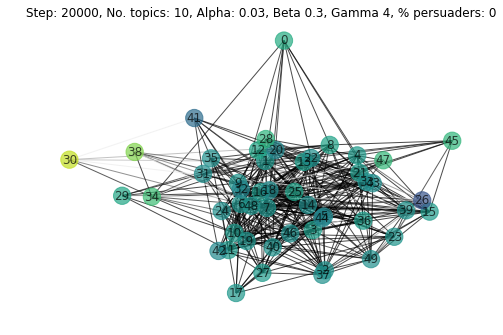

In [11]:
#show results for 1 opinion and 10 opinoons 
for t in [1,10]:
    sim = SocialDynamicsSimulation(network_size=50, alpha=0.03, beta=0.3, gamma=4, number_opinions = t,percentage_persuaders = 0,num_connections = 5)
    sim.initialize()
    for i in range(20000):
        sim.update()
    plt.figure()
    sim.observe()

## Varying the percentage of persuasive people

We will now use the original parameters and varying how many people are good persuaders.

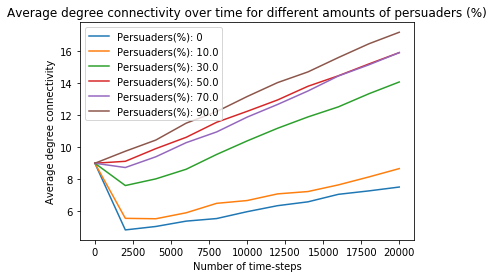

In [12]:
#Plot varying number of persuaders
for i in [0,0.1,0.3,0.5,0.7,0.9]:
    sim = [simulation(50,0.03,0.3,4,1,i) for j in range(3)]
    sim = np.mean(sim,axis=0) #average 3 simulations 
    plt.plot(np.linspace(0,20000,11),sim, label = 'Persuaders(%): '+str(i*100))

#labels
plt.xlabel('Number of time-steps')
plt.ylabel('Average degree connectivity')
plt.title('Average degree connectivity over time for different amounts of persuaders (%)') 
plt.legend()
plt.show()

It can be seen that the more persuaders we have in the model, the higher the average node's degree of connectivity is. This is expected and  can be explained by the equations:

$o_{i.new_{topic.x}} = o_{i.old_{topic.x}}+ (\alpha+p_j) w_{ij}(o_{j.old_{topic.x}}-o_{i.old_{topic.x}})$

When someone is a persuader, the $\alpha$ essentially gets bigger. This means that node i's opinion will shift towards j's faster than without the $p_j$ term. Then this will mean that $|o_i-o_j|$ will be smaller, since opinions will converge faster, and this will mean that weights will be higher, less edges will be deleted at the 0.05 threshold, and we will have higher average degree connectivity

$w_{ij.new} = w_{ij.old} + \beta w_{ij.old} (1-w_{ij.old})(1-\gamma|o_i-o_j|)$

These results can be seen as realistic, because in reality when you have very charismatic people, perhaps a politician, you see a convergence of opinions in the direction of their opinion. This results to overall more similar opinions and a better connected network. The more persuasive people you have, the greater the rate of opinion change.


## Can we get social clusters to fall apart?

Above, we have seen how to adjust the parameters to increase connectivity in a network, but how can we decrease them to create a less densely connected network?

Since $\beta$ and $\gamma$ are interconnected by the constraint on $\gamma$ ($\gamma \leq \frac{1}{\beta}+1$), and they are both parameters in the weight equation we will look at together. 

Above, we hypothesized that "if $\beta$ is large, it has a larger effect on the scaling of weights." Lets manipulate beta, while ensuring that the constraints on gamma are met. 

Below, we see that if we put $\gamma$ near its minimum (0.01), whilst varying $\beta$, the varying betas do not have much of an effect on degree connectivity. This is consistent with explanations in part 2.

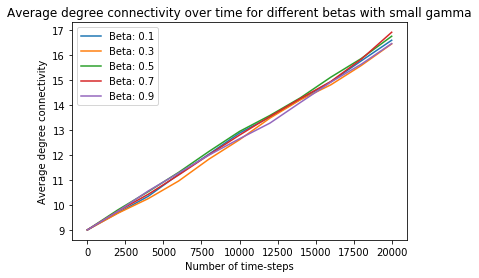

In [13]:
#varying beta
for i in [0.1,0.3,0.5,0.7,0.9]:
    sim = [simulation(50,0.03,i,0.001,1,0) for j in range(3)]
    sim = np.mean(sim,axis=0) #average 3 simulations 
    plt.plot(np.linspace(0,20000,11),sim, label = 'Beta: '+str(i))

#labels
plt.xlabel('Number of time-steps')
plt.ylabel('Average degree connectivity')
plt.title('Average degree connectivity over time for different betas with small gamma') 
plt.legend()
plt.show()

What if we vary beta while holding gamma at its maxima?

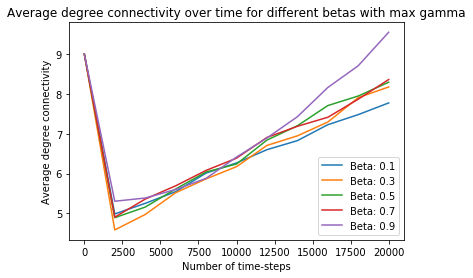

In [14]:
#vary beta, hold gamma at its maxima
for i in [0.1,0.3,0.5,0.7,0.9]:
    sim = [simulation(50,0.03,i,1+(1/i),1,0) for j in range(3)]
    sim = np.mean(sim,axis=0) #average 3 simulations 
    plt.plot(np.linspace(0,20000,11),sim, label = 'Beta: '+str(i))

#labels
plt.xlabel('Number of time-steps')
plt.ylabel('Average degree connectivity')
plt.title('Average degree connectivity over time for different betas with max gamma') 
plt.legend()
plt.show()

The plot above shows that we have the lowest average degree connectivity when we have a low beta (0.1) and its maximum gamma ($1+\frac{1}{0.1}$).  However, the differences are quite small

Let's see if we can get a network to fall apart by combing all of the parameters that have led to lower average degree connectivity:

- $\gamma = 1+(1/0.1)$
- $\beta = 0.1$
- $number.opinions = 1$
- $percentage.persuaders = 0$
- $\alpha = 0.03$

The average node connectivity over 20000 iterations (step size = 2000):


[9.0, 4.84, 5.36, 5.52, 5.92, 6.28, 6.68, 7.16, 7.4, 7.48, 7.72]

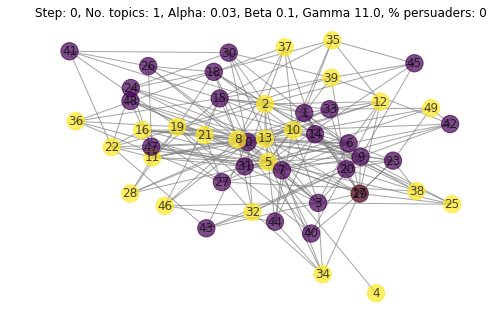

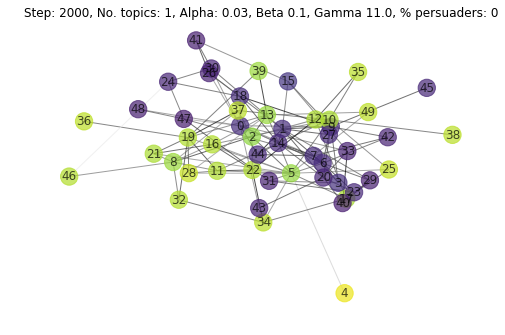

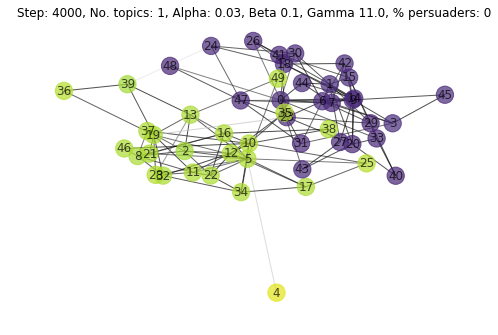

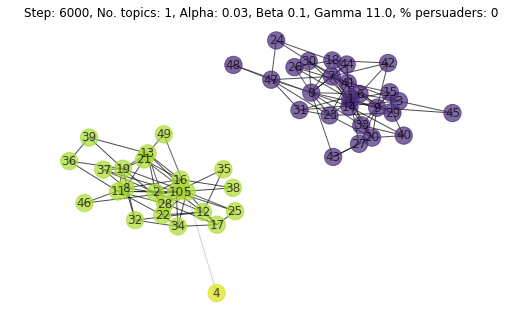

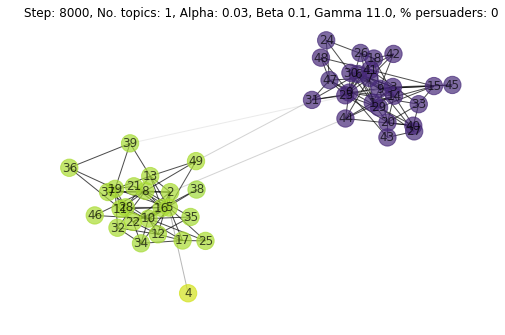

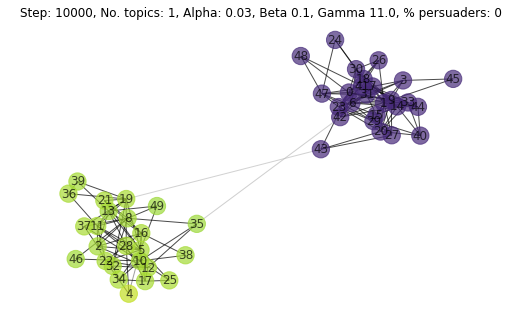

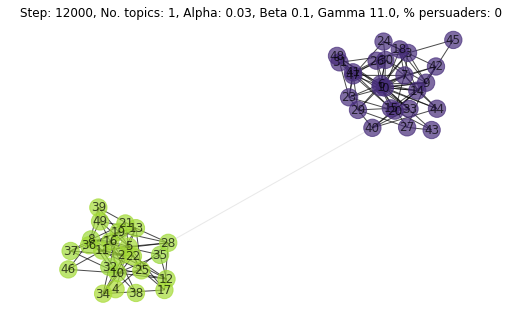

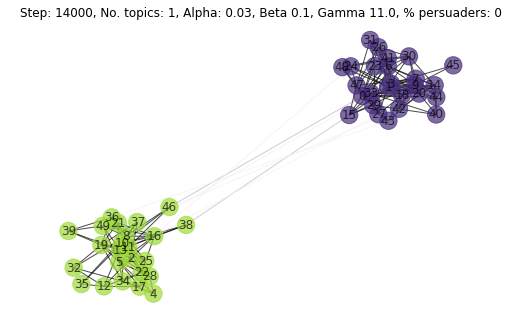

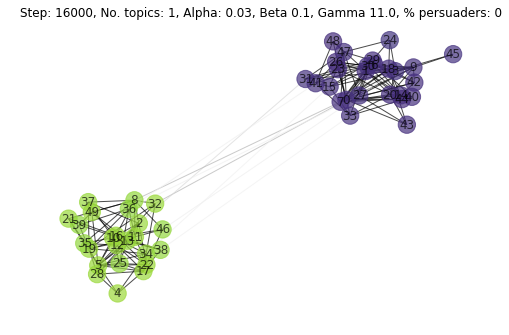

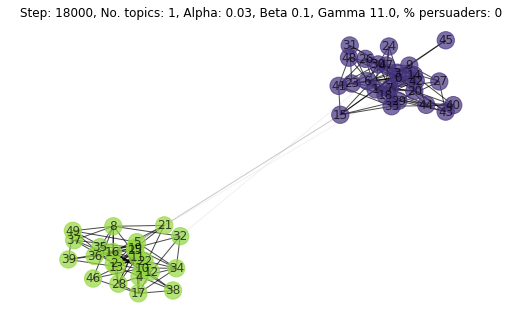

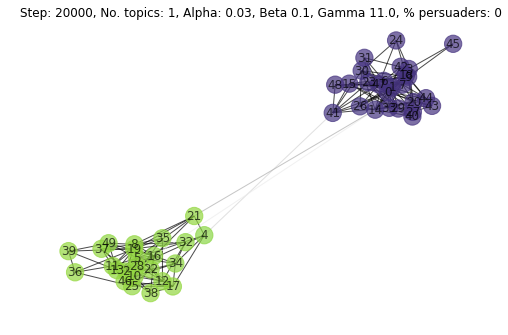

In [18]:
print('The average node connectivity over 20000 iterations (step size = 2000):')
disconnected = simulation(50,0.03,0.1,1+(1/0.1),1,0, display=True)
disconnected

With these parameters, we see a breakdown of the cohesive network and less average node connectivity in comparison to the simulations run above. We see 2 distinct clusters form and split apart. It must be noted that perhaps because we used the Barabasi-Albert graph, the popular 'hubs.' Therefore, we have been quite successful in trying to 'break' the network up by combining all of the parameters which led to lower degree connectivity. Just to sure, let us plot this networks' average degree connectivity alongside a network with parameters that are on the opposite side of extreme values for the parameters: 
- $\gamma = 0.1$
- $\beta = 0.9$
- $number.opinions = 10$
- $percentage.persuaders = 0.9$
- $\alpha = 0.3$

Below, you can see a dense social network forming, with convergence in average opinion. This is hugely different to the network above with sees less connectivity and polarisation of views.

[9.0, 9.84, 10.68, 11.16, 12.08, 12.56, 13.8, 14.72, 15.48, 16.2, 16.76]

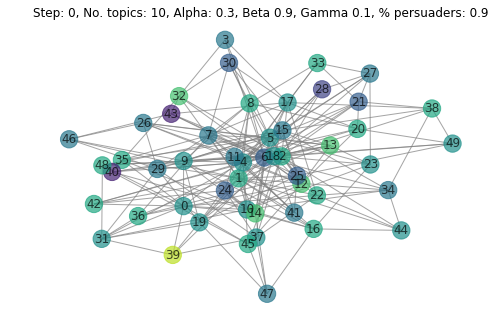

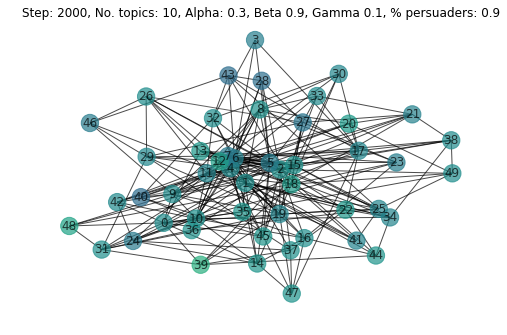

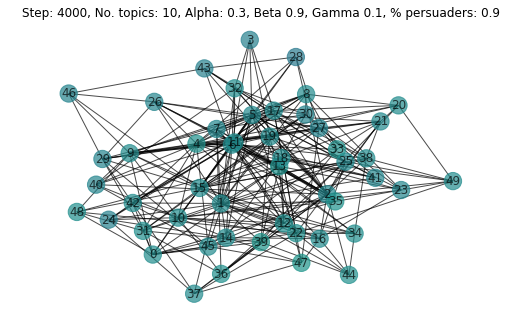

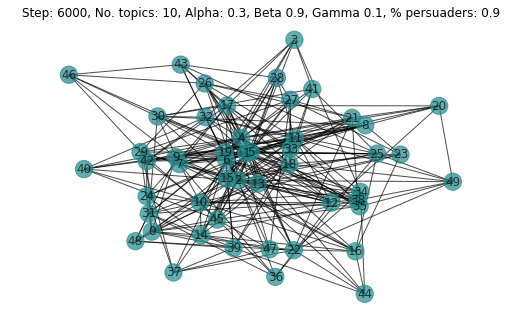

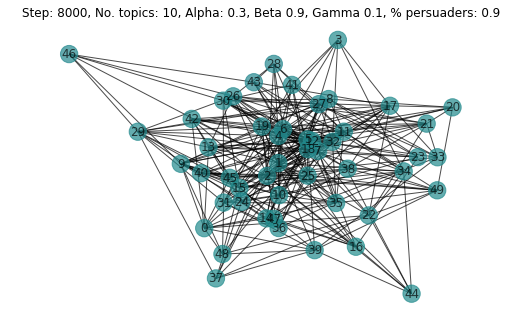

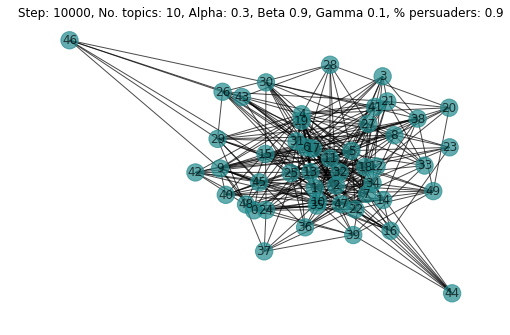

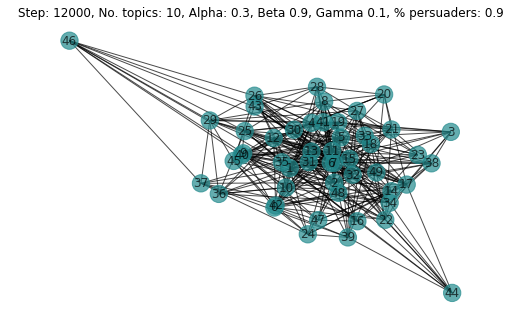

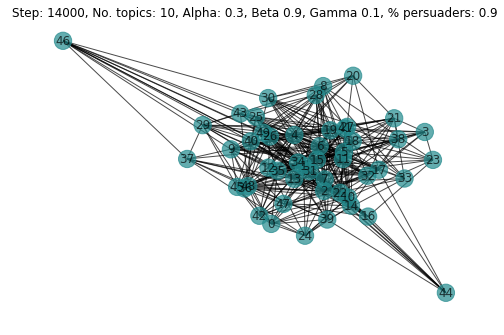

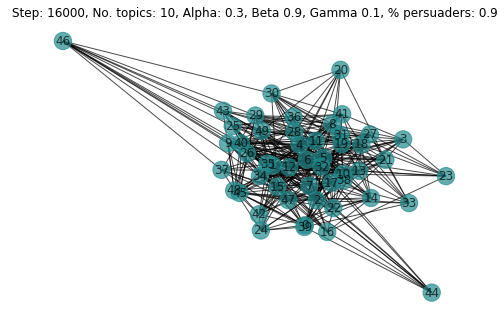

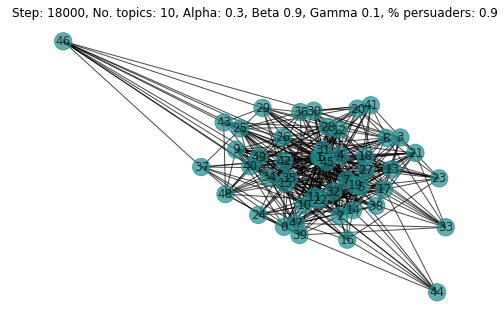

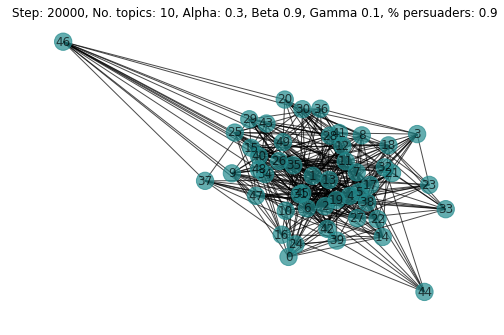

In [19]:
connected = simulation(50,0.3,0.9,0.1,10,0.9, display = True)
connected

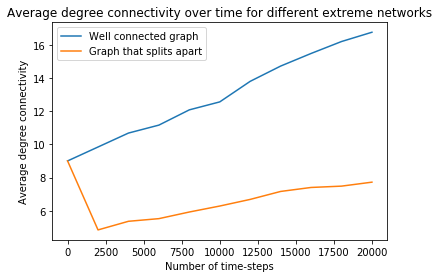

In [20]:
plt.plot(np.linspace(0,20000,11),connected, label = 'Well connected graph')
plt.plot(np.linspace(0,20000,11),disconnected, label = 'Graph that splits apart')
plt.xlabel('Number of time-steps')
plt.ylabel('Average degree connectivity')
plt.title('Average degree connectivity over time for different extreme networks') 
plt.legend()
plt.show()

The plot above shows that we can heavily influence the level of connectivity within our network by adjusting our parameters. We took what we learned from changing one factor at a time, and put together all the parameters that led to lower levels of connectivity, and then the ones that led to higher levels of connectity. Although the effects of changing parameters are not linearly additive, we can see how they compound to produce vastly different networks

# HCs

**#multiplecauses:** In the last section of this assignment, I put together all of the information that led to *lower* levels of connectivity to see how they work together. In the previous sections, I manipulated each parameter individually because I identified that each parameter is a lever I can pull to lead to a unique causal effect. By putting them all together, I acknowledged that the overall causal effect is not necessarily the sum of all of the individual casues. Futhermore, at each step I use the equations to justify the complex effects caused by the changes in parameters.

**#systemdynamics:** In my vector fields section, I analyse the impact changing parameters have on shifting basins of attraction in a network. I justify a systems tendency to converge towards a specific point by using the update rule equations to explain the systems properties. The significance of these basins of attraction become evident in the last part of this assignment where I try to get the network to split apart.

**#dataviz:** I create various plots to analyse the average degree connectivity of nodes in the network. These plots are supplementary to the network graphs I draw. It makes it easier to compare levels of connectivity of than by looking at the complicated network graphs where it would be difficult to discern how many edges there were in each network.

# References 

Sayama, H. (2015). Introduction to the modeling and analysis of complex systems. Open SUNY Textbooks, Milne Library. Genesco, NY.

# Code

In [ ]:
'''
Import relevant libraries 
'''
import itertools
import scipy
from matplotlib import pyplot as plt
import networkx as nx
import random
import numpy as np

'''
Function (modified from class) that draws
vector field plots and allows varied inputs
of alpha beta and gamma
The resulting plot is of opinion difference
and weight
'''
def draw_plot(alpha,beta,gamma):

    cmap = plt.cm.plasma  # set color

    # Tuples of opinion and weight for plot
    for opinion, weight in [
        [0.25, 0.95], [0.45, 0.95], [0.55, 0.95], [0.65, 0.95], [0.75, 0.95],
        [0.85, 0.95], [0.95, 0.95], [0.35, 0.65], [0.45, 0.75], [0.95, 0.75],
        [0.95, 0.35], [0.3, 0.25], [0.3, 0.15], [0.15, 0.06], [0.05, 0.06]
    ]:
        ow = [[opinion, 0.0, weight]]
        for i in range(100):
            delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0]) #opinion formula
            delta_w = (
                beta * ow[-1][2] * (1-ow[-1][2]) *
                (1-gamma*abs(ow[-1][1] - ow[-1][0]))) #weight formula
            new_weight = ow[-1][2] + delta_w
            if new_weight < 0.05: #delete edges of 0.05
                new_weight = 0
            ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
        plt.plot(
            [row[0] - row[1] for row in ow],
            [row[2] for row in ow],
            color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
            alpha=0.75)

    #Plotting the vector field
    opinion = scipy.linspace(0, 1, 11)  #opinion differences
    weight = scipy.linspace(0, 1, 11)   #edge weight
    ow_grid = scipy.meshgrid(opinion, weight) #create grid
    delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0] #create opinion difference grid
    delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0]) #weight grid
    plt.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid) #plot
    plt.xlabel('Opinion difference')
    plt.ylabel('Weight')
    plt.plot([0, 1], [0.05, 0.05], 'k--')
    

In [ ]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4, number_opinions = 3,percentage_persuaders = 0.2,num_connections = 5):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.number_opinions = number_opinions #how many topics we want opinions on
        self.percentage_persuaders = percentage_persuaders #proportion of charismatic people
        self.num_connections = num_connections


    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.barabasi_albert_graph(self.network_size, self.num_connections)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = [random.randint(0, 1) for _ in range(self.number_opinions)] #multiple opinions
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        for node in self.graph.nodes:
            if random.uniform(0,1) < self.percentage_persuaders:
                self.graph.nodes[node]['persuade'] = np.random.normal(0.1, 0.05, 1) #charismatic people 
            else:
                self.graph.nodes[node]['persuade'] = 0 #non charismatic people

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[np.mean(self.graph.nodes[i]['opinion']) for i in self.graph.nodes], #color is mean opinion
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step)+', No. topics: '+str(self.number_opinions)+', Alpha: '+str(self.alpha)+', Beta '+str(self.beta)+', Gamma '+str(self.gamma)+', % persuaders: '+ str(self.percentage_persuaders))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge  between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=1-abs(np.mean(self.graph.nodes[new_edge[0]]['opinion'])-np.mean(self.graph.nodes[new_edge[1]]['opinion'])))
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            persuasions = [self.graph.nodes[n]['persuade'] for n in edge]
            
            #Select a topic to talk about randomly
            #from the topics 
            topic = random.randint(0, self.number_opinions - 1)
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'][topic] = (
                    (opinions[i][topic] + (self.alpha+float(persuasions[1-i])) * weight * 
                    (opinions[1-i][topic] - opinions[i][topic]))) #add persuasiveness factor to alpha
                if self.graph.nodes[edge[i]]['opinion'][topic] > 1:
                    self.graph.nodes[edge[i]]['opinion'][topic] = 1
                
              
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(np.mean(opinions[0]) - np.mean(opinions[1]))))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
               self.graph.remove_edge(*edge)
        self.step += 1

In [ ]:
'''
Function to simulate graphs with different parameters
and store the clustering coefficients at different steps 
'''
def simulation(network_size, alpha, beta, gamma, number_opinions,percentage_persuaders, display=False):
    #initialise
    sim = SocialDynamicsSimulation(network_size=network_size, alpha=alpha, beta=beta, gamma=gamma, number_opinions = number_opinions,percentage_persuaders = percentage_persuaders,num_connections = 5)
    sim.initialize()
    if display == True:
        plt.figure()
        sim.observe()
    cluster_coeff = [2 * sim.graph.number_of_edges() / sim.graph.number_of_nodes()]
    for i in range(10): #iterate 
        for i in range(2000):
            sim.update()
        if display == True: #display
            plt.figure()
            sim.observe()
        #store average degree of nodes
        average_degree = 2 * sim.graph.number_of_edges() / sim.graph.number_of_nodes()
        cluster_coeff.append(average_degree)
    return cluster_coeff
        